In [1]:
pip install  kagglehub -q


Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datadrivenx/social-media-and-mental-health")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\navne\.cache\kagglehub\datasets\datadrivenx\social-media-and-mental-health\versions\2


In [3]:
import os

# Directory path
dataset_path = path

# List files in the directory
files = os.listdir(dataset_path)
print("Files in the dataset directory:", files)


Files in the dataset directory: ['codebook.docx', 'MENTAL HEALTH DATA.csv', 'student-guidebook-for-mental-health-dataset.docx']


In [4]:
pip install python-docx -q

Note: you may need to restart the kernel to use updated packages.


In [5]:
from docx import Document

# Path to the codebook
codebook_path = r"C:\Users\navne\.cache\kagglehub\datasets\datadrivenx\social-media-and-mental-health\versions\2\codebook.docx"

# Load the document
doc = Document(codebook_path)

# Print content
print("Codebook Content:")
for paragraph in doc.paragraphs:
    print(paragraph.text)


Codebook Content:
Year_1 - Birth Year
Range: 1971-2003

State_1 - State (abbreviations)
Students from 48 different states within the United States of America

General_Health
Considering your age, how would you describe your general health?
Poor, Fair, Good, Very Good, Excellent



(phq9_X/phq9_XNUM) Over the last two weeks, how often have you been bothered by the following problems?
Little interest or pleasure in doing things?

Feeling down, depressed, or hopeless?

Trouble falling or staying asleep, or sleeping too much?

Feeling tired or having little energy?	

Poor appetite or overeating?	

Feeling bad about yourself â€” or that you are a failure or have let yourself or your family down?	

Trouble concentrating on things, such as reading the newspaper or watching television?	

Moving or speaking so slowly that other people could have noticed? Or the opposite - being so fidgety or restless that you have been moving a lot more than usual?	

Thoughts that you would be better off dead, 

In [6]:
import pandas as pd

# Path to the CSV file
csv_path = r"C:\Users\navne\.cache\kagglehub\datasets\datadrivenx\social-media-and-mental-health\versions\2\MENTAL HEALTH DATA.csv"

# Load the CSV into a DataFrame
data = pd.read_csv(csv_path)

In [7]:
data.describe

<bound method NDFrame.describe of      year_1 state_1 general_health                      phq9_1  \
0      2000      MD      Very Good                Several days   
1      2001      SC           Good  More than half of the days   
2      1999      NJ           Good                Several days   
3      1998      NY           Good                Several days   
4      2000      PA      Very Good                  Not at all   
..      ...     ...            ...                         ...   
574    2001      OH      Very Good  More than half of the days   
575    1991      NJ           Good  More than half of the days   
576    1991      VA           Poor  More than half of the days   
577    2000      GA      Very Good                  Not at all   
578    2000      NC      Very Good                  Not at all   

                         phq9_2                      phq9_3  \
0                  Several days                  Not at all   
1    More than half of the days            Near

In [8]:
# rename needed columns
data.rename(columns={'state_1': 'state'}, inplace=True)
data.rename(columns={'year_1': 'year'}, inplace=True)
data.rename(columns={'phq9_6 NUM': 'phq9_6NUM'}, inplace=True)

In [9]:
# get columns with their data type
for col in data.columns:
    print(f'{col} : {data[col].dtype}')

year : int64
state : object
general_health : object
phq9_1 : object
phq9_2 : object
phq9_3 : object
phq9_4 : object
phq9_5 : object
phq9_6 : object
phq9_7 : object
phq9_8 : object
phq9_9 : object
phq9_1NUM : int64
phq9_2NUM : int64
phq9_3NUM : int64
phq9_4NUM : int64
phq9_5NUM : int64
phq9_6NUM : int64
phq9_7NUM : int64
phq9_8NUM : int64
phq9_9NUM : int64
phq9_COMP : int64
phq9_severity : object
gad7_1 : object
gad7_2 : object
gad7_3 : object
gad7_4 : object
gad7_5 : object
gad7_6 : object
gad7_7 : object
gad7_1NUM : int64
gad7_2NUM : int64
gad7_3NUM : int64
gad7_4NUM : int64
gad7_5NUM : int64
gad7_6NUM : int64
gad7_7NUM : int64
gad7_COMP : int64
gad7_severity : object
acha_12months_times_1 : object
acha_12months_times_2 : object
acha_12months_times_3 : object
acha_12months_times_4 : object
acha_12months_times_5 : object
acha_12months_times_6 : object
acha_12months_times_7 : object
acha_depression : object
acha_services_1 : object
acha_services_2 : object
acha_services_3 : object
acha_

In [10]:
# Drop columns that are not needed 
for i in range(1,30):
    column_name = f'acha_12months_any_{i}'
    data.drop(columns=[column_name],inplace=True)
    column_name = f'acha_12months_any_{i}NUM'
    data.drop(columns=[column_name],inplace=True)

In [11]:
# Join similar columns into one column
data['race'] = data[['race_1', 'race_2', 'race_3', 'race_4', 'race_5', 'race_6']].apply(
    lambda x: ' '.join(x.dropna().astype(str)), axis=1
)

data.drop(columns=['race_1', 'race_2', 'race_3', 'race_4', 'race_5', 'race_6'],inplace=True)

In [12]:
df = pd.DataFrame(data)

# Apply styling to the new DataFrame
styled_df = df.style.set_table_styles(
    [
        {'selector': 'th', 'props': [('border', '2px solid black'), ('text-align', 'center'), ('background-color', '#f0f0f0')]},
        {'selector': 'td', 'props': [('border', '1px solid black'), ('text-align', 'center')]},
    ]
).set_properties(**{'font-size': '11pt', 'text-align': 'center'}) 

# Save the styled DataFrame to an HTML file
styled_df.to_html('styled_dataframe.html', escape=False)

# Display the styled DataFrame
styled_df

In [13]:
data['general_health'].value_counts()

general_health
Good         227
Very Good    178
Fair         103
Excellent     42
Poor          29
Name: count, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from warnings import filterwarnings
filterwarnings(action='ignore')

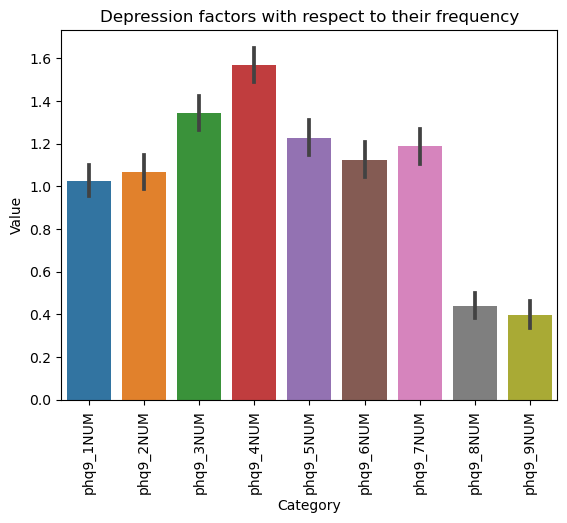

In [16]:
import pandas as pd

# melt the DataFrame to long format
category = ['phq9_1', 'phq9_2', 'phq9_3', 'phq9_4', 'phq9_5', 'phq9_6', 'phq9_7', 'phq9_8', 'phq9_9']
value = ['phq9_1NUM', 'phq9_2NUM', 'phq9_3NUM', 'phq9_4NUM', 'phq9_5NUM', 'phq9_6NUM', 'phq9_7NUM', 'phq9_8NUM', 'phq9_9NUM']

# Melt the data into long format (so each category and corresponding value is a pair)
df_melted = pd.melt(data, id_vars=category, value_vars=value, var_name="Category", value_name="Value")

# Now plot the relationship between the category and value
sns.barplot(x='Category', y='Value', data=df_melted)
plt.xticks(rotation=90) 
plt.title('Depression factors with respect to their frequency')
plt.show()

#### Relationship Between General Health and Depression factors

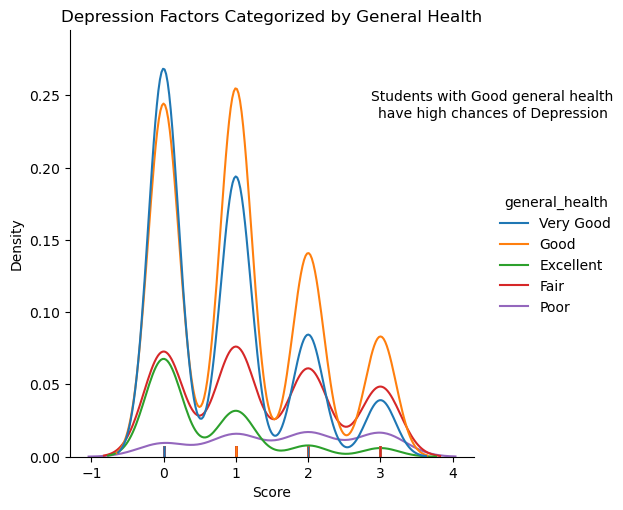

In [17]:
phq9_columns = ['phq9_1NUM', 'phq9_2NUM', 'phq9_3NUM', 'phq9_4NUM', 'phq9_5NUM', 
                'phq9_6NUM', 'phq9_7NUM', 'phq9_8NUM', 'phq9_9NUM']

# Melt the DataFrame into long format
melted_data = data.melt(id_vars="general_health", value_vars=phq9_columns, 
                        var_name="Question", value_name="Score")

# Plot distributions categorized by general_health
sns.displot(data=melted_data, x="Score", hue="general_health", kind="kde", rug=True)
plt.title("Depression Factors Categorized by General Health")
plt.figtext(0.8, 0.8, "Students with Good general health have high chances of Depression", 
            wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

#### Relationship Between General Health and Anxiety factors

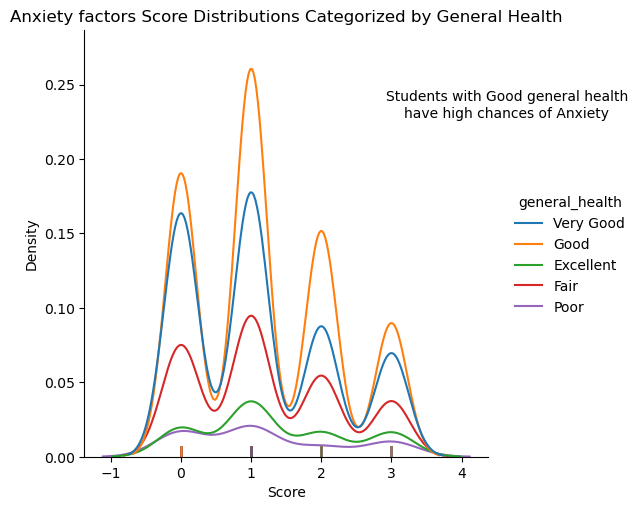

In [18]:
gad7_columns = ['gad7_1NUM','gad7_2NUM','gad7_3NUM','gad7_4NUM',
                'gad7_5NUM','gad7_6NUM','gad7_7NUM']

# Melt the DataFrame into long format
melted_data = data.melt(id_vars="general_health", value_vars=gad7_columns, 
                        var_name="Question", value_name="Score")

# Plot distributions categorized by general_health
sns.displot(data=melted_data, x="Score", hue="general_health", kind="kde", rug=True)
plt.title("Anxiety factors Score Distributions Categorized by General Health")
plt.figtext(0.8, 0.8, "Students with Good general health have high chances of Anxiety", 
            wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

#### Relationship Between General Health and overall evaluation

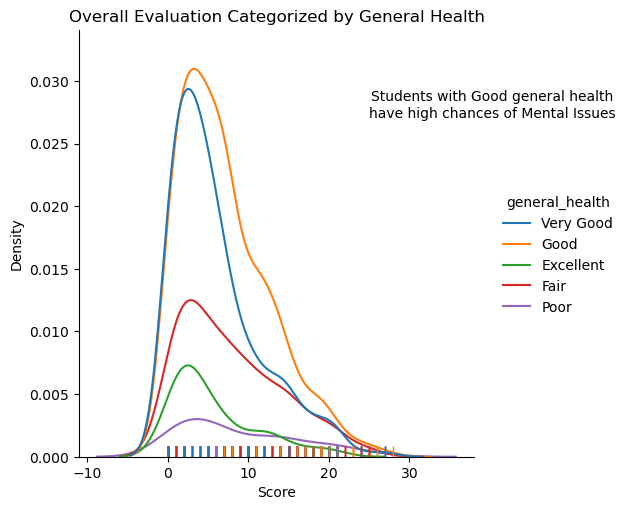

In [19]:
columns = ['phq9_COMP','gad7_COMP','acha_12months_any_comp']

# Melt the DataFrame into long format
melted_data = data.melt(id_vars="general_health", value_vars=columns, 
                        var_name="Question", value_name="Score")

# Plot distributions categorized by general_health
sns.displot(data=melted_data, x="Score", hue="general_health", kind="kde", rug=True)
plt.title("Overall Evaluation Categorized by General Health")
plt.figtext(0.8, 0.8, "Students with Good general health have high chances of Mental Issues", 
            wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

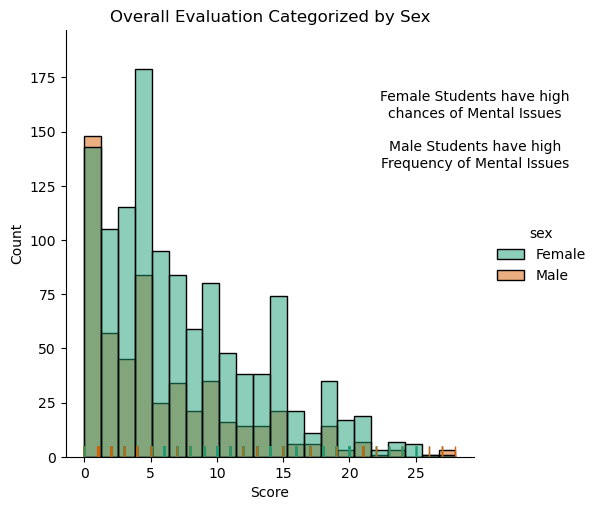

In [20]:
columns = ['phq9_COMP','gad7_COMP','acha_12months_any_comp']

# Melt the DataFrame into long format
melted_data = data.melt(id_vars="sex", value_vars=columns, 
                        var_name="Question", value_name="Score")

# Plot distributions categorized by general_health
sns.displot(data=melted_data, x="Score", hue="sex", kind="hist",palette='Dark2',rug=True)
plt.title("Overall Evaluation Categorized by Sex")
plt.figtext(0.8, 0.8, "Female Students have high chances of Mental Issues", 
            wrap=True, horizontalalignment='center', fontsize=10)
plt.figtext(0.8, 0.7, "Male Students have high Frequency of Mental Issues", 
            wrap=True, horizontalalignment='center', fontsize=10)
plt.show()